# Refactor DVC y MLflow

Este refactor crea funciones para el proceso de entrenar un modelo de ML de forma que este flujo puede usarse con dvc a traves de `dvc.yaml` y el comando `dvc repro`, asi como tambien podrian ser parte de un flujo con MLflow

In [17]:
! dvc repro ../dvc.yaml -f

Running stage '../dvc.yaml:data_load':                                core>
> python src/stages/data_load.py --config=params.yaml
Number of features in dataset: 32
Shape of initial dataset (145, 32)
Done saving artifacts
                                                                                
Running stage '../dvc.yaml:data_split':
> python src/stages/data_split.py --config=params.yaml
Splitting dataset into train and test-val dataset - 0.7 train proportion
Splitting test-val dataset into test and validation dataset - 0.5 val proportion with respect to test
Done saving artifacts
                                                                                
Running stage '../dvc.yaml:features_transform':
> python src/stages/features_transform.py --config=params.yaml
finish transformations
shapes for train -> (101, 63)
shapes for test -> (22, 63)
shapes for val -> (22, 63)
Done saving artifacts
                                                                                
Run

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from src.stages.data_load import load_data
from src.stages.data_split import split_data
from src.stages.features_transform import features_transform
from src.stages.train_model import train_model
from src.stages.evaluate import evaluate_model

In [20]:
from src.utils import read_config_params

config_params = read_config_params("../params.yaml")

In [21]:
data = load_data()

Number of features in dataset: 32
Shape of initial dataset (145, 32)


In [22]:
df_train, df_test, df_val = split_data(config_params, data)

Splitting dataset into train and test-val dataset - 0.7 train proportion
Splitting test-val dataset into test and validation dataset - 0.5 val proportion with respect to test


In [23]:
df_train, df_test, df_val = features_transform(df_train, df_test, df_val)

finish transformations
shapes for train -> (101, 63)
shapes for test -> (22, 63)
shapes for val -> (22, 63)


In [24]:
model, _ = train_model(config_params, df_train)

Training model SGP with {'n_estimators': 100, 'max_depth': 6, 'random_state': 12}


In [25]:
metrics, disp = evaluate_model(config_params, df_test, model)

print(metrics)

SUPER IMPORTANTES tipo de df_test <class 'pandas.core.frame.DataFrame'>
tipo de X_test <class 'pandas.core.frame.DataFrame'>
tipo de y_test <class 'pandas.core.frame.DataFrame'>
COLUMNAS -> Index(['62'], dtype='object')
Accuracy = 0.45454545454545453
MSE = 5.590909090909091
RMSE = 2.364510327934537
{'accuracy': 0.45454545454545453, 'mse': np.float64(5.590909090909091), 'rmse': np.float64(2.364510327934537)}


/home/marcela/repos/mna_mlops_equipo39/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


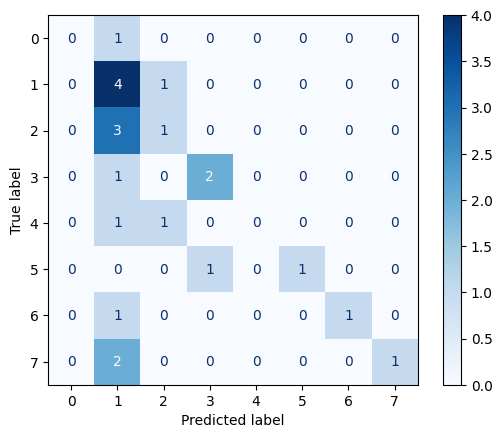

In [26]:
disp.plot(cmap="Blues")